<a href="https://colab.research.google.com/github/viniciusacosta/consumo_serveja/blob/main/consumo_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Otimizando a venda de cervejas no Carnaval 2022 (se ele existisse)**

## **1. Descrição geral do problema**

Motivação
A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Não sem razão, é perfeito para quase todas as
situações, desde happy hour até grandes festas de casamento. Se você só pensar nisso, você já sente vontade de tomar
uma cerveja, você não está sozinho.

A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes
situações. Mas você já parou para pensar em quais países são os que mais consomem cerveja no mundo? A primeira que
lhe veio à cabeça foi a Alemanha? Bem, saiba que não é assim.

A resposta a essa pergunta é retumbante: a República Tcheca. Segundo pesquisa da empresa japonesa de bebidas Kirin, o
país lidera a tabela de consumo de cerveja per capita por 23 anos consecutivos. 
Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os tchecos beberam 142,4 litros por pessoa. Isso
é o equivalente a 250 canecas—ou uma a cada 35 horas. Mas, dado que é improvável que os menores contribuam para esse
número, é seguro supor que o bebedor médio de cerveja provavelmente bebe um pouco mais.

Áustria e Alemanha vêm em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em
segundo lugar estão as Seychelles, uma classificação elevada que atribuímos ao clima quente e ao grande número de
turistas.

Foram coletados alguns dados de São Paulo—Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média), com o intuito de desenvolver um estudo e responder uma simples pergunta: 
 
Se existisse um carnaval? E um bar quisesse escolher o melhor dia para vender cervejas em SP, qual dos dias abaixo poderiamos sugerir e por que?

*   26/02/2022
*   27/02/2022
*   28/02/2022
*   01/03/2022
*   02/03/2022

## **2.0 Carregando Dados**

### **2.1 Importando bibliotecas necessárias**

Começaremos nosso projeto, importanto todas as bilbiotecas necessárias, para a realização das fases iniciais de exploração, e transformação dos dados (Data Munging).

In [89]:
# Importando bibliotecas, para a manipulação e exploração dos conjuntos de dados.
import pandas as pd
import numpy as np
import itertools

# Importando bibliotecas, para a plotagem de gráficos interativos com o plotly.

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Importando bibliotecas, para a plotagem de gráficos com o Seaborn e Matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns

# Importando biblioteca, para ocultar Future Warnings.
import warnings
warnings.filterwarnings('ignore')

# Importando bibliotecas, para a etapa de pré-processamento dos dados.
from sklearn.preprocessing import StandardScaler

# Importando bibliotecas, para a etapa de modelagem preditiva.
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso, Ridge

# Importando bibliotecas, para avaliação dos modelos.
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

import time

### **2.2 Carregando Dados**

In [90]:
# Carregando conjunto de dados.
df =  pd.read_csv('https://raw.githubusercontent.com/viniciusacosta/consumo_serveja/main/consumo_cerveja_historico.csv')

# Exibindo as primeiras linhas do DataFrame.
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


O dataset acima possui alguns dados climáticos de uma determinada região de São Paulo para todos os dias do ano de 2015 e também a informação se o dia em questão é final de semana (1) ou não (0).

## **3.0 Data Munging - Preparando os dados**

Com o intuito de facilitar a manipulação dos dados e de padronizar todo o dataset, vamos deixar todas as letras em minusculo e retirar todos os espaços dos nomes das colunas

In [91]:
# Subistituindo os espaços dos nomes.
df.columns = df.columns.str.replace(' ', '_')

# Transformando todas as letras em minúsculas.
df.columns = df.columns.str.lower()

# Resultado da transformação
df.columns

Index(['data', 'temperatura_media_(c)', 'temperatura_minima_(c)',
       'temperatura_maxima_(c)', 'precipitacao_(mm)', 'final_de_semana',
       'consumo_de_cerveja_(litros)'],
      dtype='object')

In [92]:
# Verificando as dimensões do dataset.
df.shape

(941, 7)

Verificamos a existência de **7 variáveis**, e **941 observações** dentro do dataset.

In [93]:
# Verificando o número de NAs existentes dentro do dataset
df.isna().sum()

data                           576
temperatura_media_(c)          576
temperatura_minima_(c)         576
temperatura_maxima_(c)         576
precipitacao_(mm)              576
final_de_semana                576
consumo_de_cerveja_(litros)    576
dtype: int64

Percebemos a presença de **576 valores nulos** dentro do dataset.

In [94]:
# Verificando a localização dos valores NaN
df[df.isnull().any(axis=1)]

,data,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana,consumo_de_cerveja_(litros)
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por ser um dataset somente do ano de 2015, **todas as linhas que estão com valores NaN estão completamente vazias**, não sendo relevantes para a análise, o que facilita o processo de remoção/transformação.

In [95]:
# Removendo os valores NaN do dataset
df = df.dropna()

# Verificando o número de NaN existentes dentro do dataset
df.isna().sum()

data                           0
temperatura_media_(c)          0
temperatura_minima_(c)         0
temperatura_maxima_(c)         0
precipitacao_(mm)              0
final_de_semana                0
consumo_de_cerveja_(litros)    0
dtype: int64

In [96]:
# Contabilizando o número de valores únicos em cada variável do dataset.
info = df.nunique().sort_values()

# Determinando o tipo de dado de cada uma das variáveis do dataset.
info = pd.DataFrame(info.values, index = info.index, columns = ['NUniques'])

# Atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.
info['dtypes'] = df.dtypes

# Exibindo informações.
info

,NUniques,dtypes
final_de_semana,2,float64
precipitacao_(mm),93,object
temperatura_minima_(c),110,object
temperatura_maxima_(c),151,object
temperatura_media_(c),277,object
consumo_de_cerveja_(litros),359,float64
data,365,object


A maior parte das variáveis preditoras, apresentam um grande número de valores únicos. Porém, os tipos de dados de cada coluna não condiz com seus valores apresentados, sendo necessário a sua transformação.

In [97]:
## Transformando tipo de dado  das colunas
# Object to float64
df[['temperatura_media_(c)', 'temperatura_minima_(c)',
       'temperatura_maxima_(c)', 'precipitacao_(mm)',
       'consumo_de_cerveja_(litros)']] = df[['temperatura_media_(c)', 'temperatura_minima_(c)',
       'temperatura_maxima_(c)', 'precipitacao_(mm)',
       'consumo_de_cerveja_(litros)']].replace(',', '.', regex=True).astype(float)

# Object to datetime
df['data'] = pd.to_datetime(df['data'].str.strip(), format='%Y/%m/%d')

# Verificando dtypes
info = df.nunique().sort_values()
info = pd.DataFrame(info.values, index = info.index, columns = ['NUniques'])
info['dtypes'] = df.dtypes
info

,NUniques,dtypes
final_de_semana,2,float64
precipitacao_(mm),93,float64
temperatura_minima_(c),110,float64
temperatura_maxima_(c),151,float64
temperatura_media_(c),277,float64
consumo_de_cerveja_(litros),359,float64
data,365,datetime64[ns]


In [98]:
# Criando coluna MES
df['mes'] = pd.DatetimeIndex(df['data']).month

# Criando coluna DIA
df['dia'] = df['data'].dt.day_name()

df

,data,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana,consumo_de_cerveja_(litros),mes,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,Sunday
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1,Monday
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,12,Sunday
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,12,Monday
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,12,Tuesday
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,12,Wednesday


## **4.0 Análise Exploratória dos Dados**

,count,mean,std,min,25%,50%,75%,max
temperatura_media_(c),365.0,21.226356,3.180108,12.900,19.020,21.380,23.280,28.860
temperatura_minima_(c),365.0,17.461370,2.826185,10.600,15.300,17.900,19.600,24.500
temperatura_maxima_(c),365.0,26.611507,4.317366,14.500,23.800,26.900,29.400,36.500
precipitacao_(mm),365.0,5.196712,12.417844,0.000,0.000,0.000,3.200,94.800
final_de_semana,365.0,0.284932,0.452001,0.000,0.000,0.000,1.000,1.000
consumo_de_cerveja_(litros),365.0,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937
mes,365.0,6.526027,3.452584,1.000,4.000,7.000,10.000,12.000


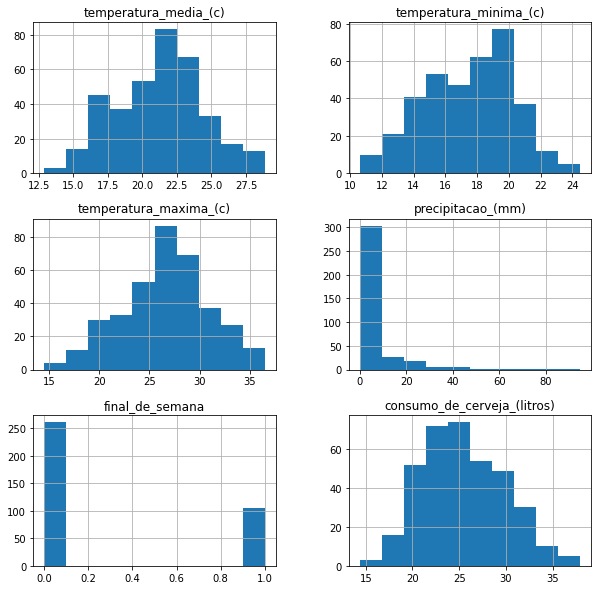

In [99]:
df.drop(columns=['mes', 'data']).hist(figsize=(10,10))
df.describe().T

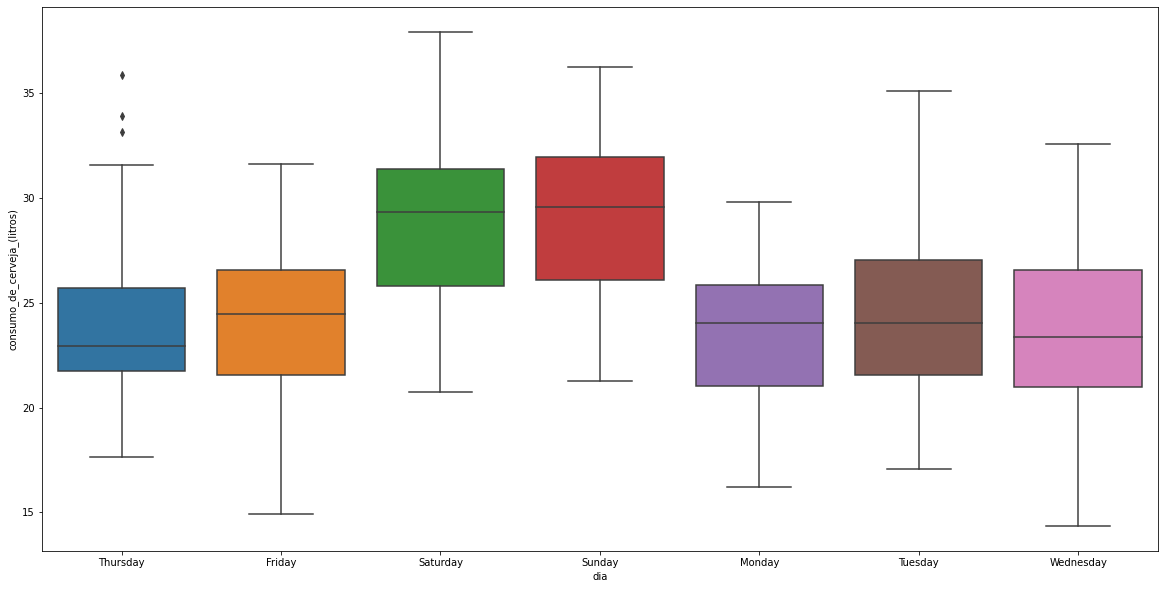

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=df['dia'], y=df['consumo_de_cerveja_(litros)'], data=df, ax=ax)
plt.show()

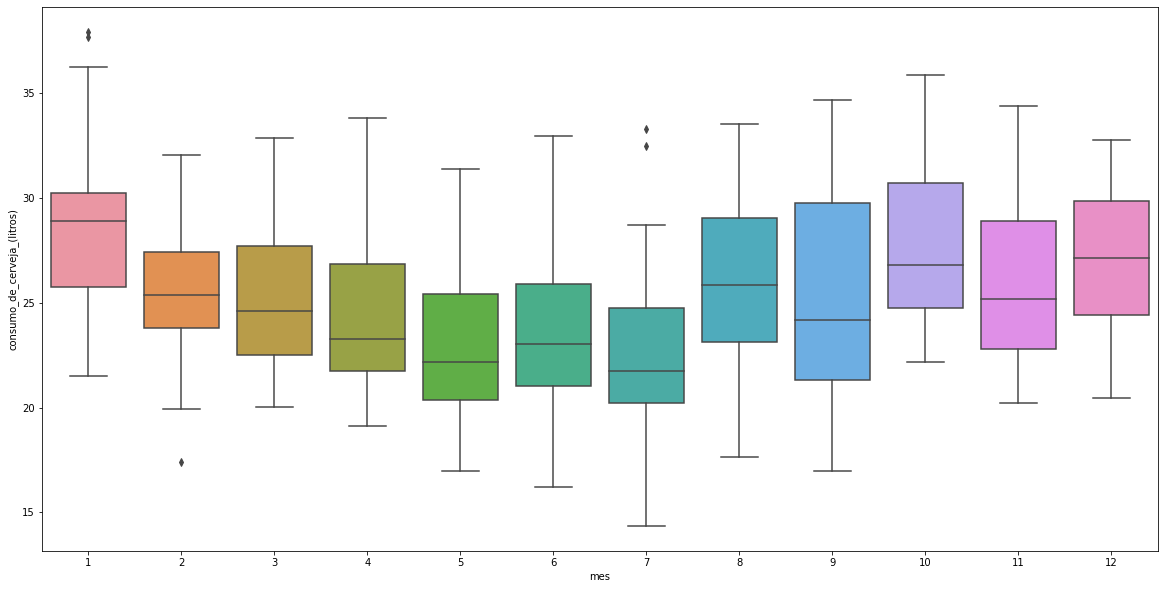

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=df['mes'], y=df['consumo_de_cerveja_(litros)'], data=df, ax=ax)
plt.show()

FAZER SÓ OS HISTOGRAMAS POR MES

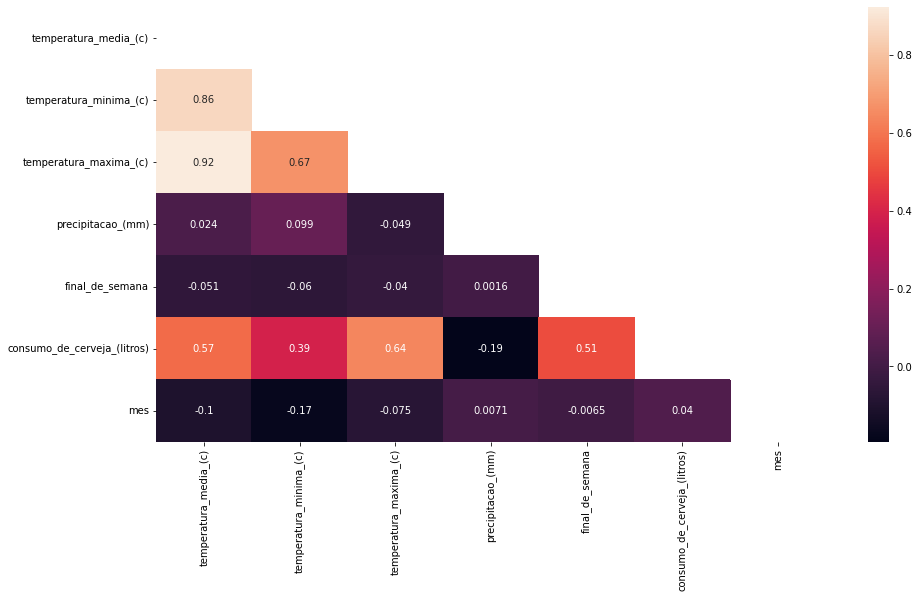

In [102]:
# Verificando correlação das features
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))

**CONSUMO DE CERVEJA ESTÁ MAIS LIGADO COM OS FINAIS DE SEMANA, TEMPERATURA MÉDIA E MÁXIMA**

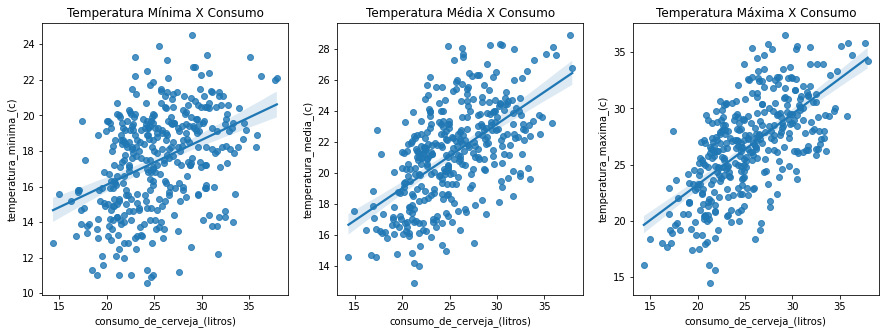

In [103]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].set_title('Temperatura Mínima X Consumo')
axes[1].set_title('Temperatura Média X Consumo')
axes[2].set_title('Temperatura Máxima X Consumo')

sns.regplot(x='consumo_de_cerveja_(litros)', y='temperatura_minima_(c)', data=df, ax = axes[0])
sns.regplot(x=df['consumo_de_cerveja_(litros)'], y=df['temperatura_media_(c)'], ax = axes[1])
sns.regplot(x=df['consumo_de_cerveja_(litros)'], y=df['temperatura_maxima_(c)'], ax = axes[2])

CRIAR GRAFICOS SEPARADOS PARA FINAL DE SEMANA

*  O consumo de cerveja tende a aumentar principalmente à medida que o valor das Temperaturas Média e Máxima (C) aumentam linearmente.
*  Embora apresente valores discrepantes e não pareça seguir exatamente uma linha. O consumo de cerveja também parece ter uma relação com o aumento das Temperaturas Mínimas (C) 

Prosseguindo, vamos analisar a distribuição da variável alvo Consumo de cerveja.

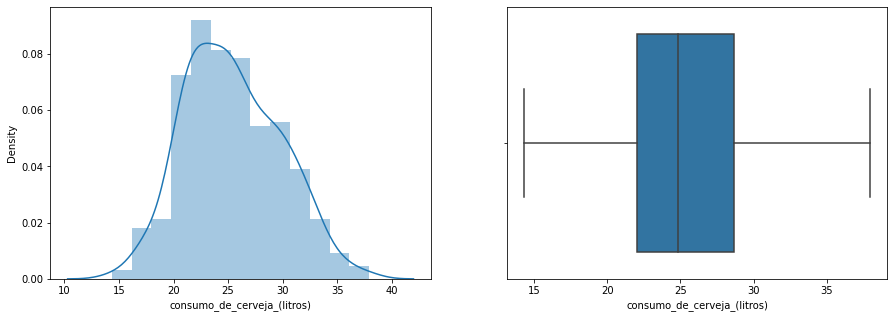

In [104]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['consumo_de_cerveja_(litros)'], ax = axes[0])
sns.boxplot(df['consumo_de_cerveja_(litros)'], ax = axes[1])
plt.show()

*  Podemos verificar que a variável alvo possui uma distribuição próxima a uma normal. Sem nenhum outlier. 

## **5.0 Modelagem**

### **5.1 Criando funções auxiliares**

In [105]:
### Criando Funções
## Holdout treino e teste
def get_train_test(X, Y,test_size_p):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size_p, random_state=42)
  return x_train, x_test, y_train, y_test


## Aplicação dos modelos
# Modelo de Regressão Linear
def model_linear_apply(model, x_train, x_test, y_train):
  lm = model()
  lm.fit(x_train, y_train)
  yHat = lm.predict(x_test)
  return yHat

def evaluate_model(y_test, yHat):
  ax1=sns.distplot(y_test, hist=False, color='r', label='Valor Real')
  sns.distplot(yHat, hist=False, ax=ax1, color='b', label='Valor Previsto')
  plt.legend()
  plt.show()
  stats = pd.DataFrame({  
      'R2'    : r2_score(y_test, yHat),
      'MAE'    : mean_absolute_error(y_test, yHat),  
      'MSE'   : mean_squared_error(y_test, yHat), 
      'RMSE'  : np.sqrt(mean_squared_error(y_test, yHat))
      }, index = ['RESULT'])
  return stats


## Criando Pipelines de trabalho
# Regressão Linear 
def pipeline_linear(X, Y, model, test_size_p):
  x_train, x_test, y_train, y_test = get_train_test(X, Y, test_size_p)
  yHat = model_linear_apply(model, x_train, x_test, y_train)
  stats = evaluate_model(y_test, yHat)
  return stats

In [106]:
# Função para cálculo das métricas.
def evaluate(y_test, yHat, modelo):
  # Criando um dataframe, com as métricas avaliadoras
    stat = pd.DataFrame({'R2'  : r2_score(y_test, yHat),  
                          'MAE' : mean_absolute_error(y_test, yHat), 
                          'MSE' : mean_squared_error(y_test, yHat),  
                          'RMSE': np.sqrt(mean_squared_error(y_test, yHat))
        }, index=[modelo])
    
    #stats = stats.append([stat])

  # Retornando o dataframe obtido
    return stat

In [107]:
# Função para criação de um dataframe com todas as métricas 
def get_stats(x_train, x_test, y_train, y_test, models, degree_p=''):
  stats = pd.DataFrame({})
  for model in models:
      if model == PolynomialFeatures:
        for p in degree_p:
          modelo = model()
          pr = PolynomialFeatures(degree=p)
          x_new_train = pr.fit_transform(x_train)
          x_new_test = pr.fit_transform(x_test)
          lm = LinearRegression()
          lm.fit(x_new_train, y_train)
          yHat = lm.predict(x_new_test)
          index_m = 'teste' + str(modelo)
          stat = evaluate(y_test, yHat, modelo)
          stats = stats.append([stat])
      
      else:
        modelo = model()
        modelo.fit(x_train, y_train)
        yHat = modelo.predict(x_test)
        index_m = 'teste' + str(modelo)
        stat = evaluate(y_test, yHat, modelo)
        stats = stats.append([stat])

  return stats

In [108]:
# Função para obtenção de listas com diferentes combinações de features
def get_y_target(colunas):
  y_target = []
  for r in range(0, len(colunas) + 1):
      combinations_object = itertools.combinations(colunas, r)
      a = [list(x) for x in combinations_object]
      for b in a:
        y_target.append(b)  
  return y_target[1:-1]

In [109]:
# Criando função para treinamento de modelos e cálculo de suas métricas

def pipeline_auto(columns, x_target, models, degree_p=''):
  status = pd.DataFrame({})
  for col in get_y_target(columns):
    if len(col) == 1:
      string = ''.join([str(letra) for letra in col])
      X = df[string].values.reshape(-1,1)
      Y = x_target
      x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
      stats = get_stats(x_train, x_test, y_train, y_test, models, degree_p)
      stats['y_target'] = string
      status = status.append([stats])

    else: 
      X = df[col]
      Y = x_target
      x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
      stats = get_stats(x_train, x_test, y_train, y_test, models, degree_p)
      string = ' / '.join([str(letra) for letra in col])
      stats['y_target'] = string
      status = status.append([stats])

  status.reset_index(inplace=True)
  status.set_index(['y_target', 'index'], inplace=True)
  return status

### **5.2 Criando modelos e avaliando suas performances**

#### **5.2.1 Criando baseline**

Para a criação de uma baseline, iremos utilizar a variável **Temperatura Máxima (C)**, visto seu maior índice de correlação com nossa variável alvo **Consumo de Cerveja (Litros)**.

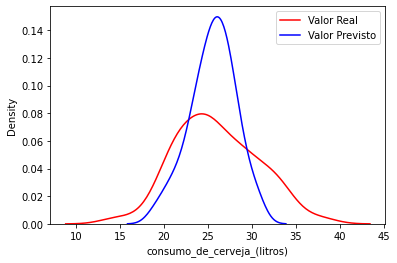

,R2,MAE,MSE,RMSE
RESULT,0.460115,2.721261,11.776035,3.431623


In [110]:
# Definindo o nome da variável a ser analisada.
x_target = df['temperatura_maxima_(c)'].values.reshape(-1,1)
y_target = df['consumo_de_cerveja_(litros)']

# Modelo Linear
pipeline_linear(  
    X = x_target,   
    Y = y_target,   
    model = LinearRegression, 
    test_size_p = 0.3 
    )


As métricas de regressão baseiam-se na diferença entre o valor real e o previsto.

- **R²:** Neste coeficiente de determinação, é representado o percentual da variância dos dados que é explicado pelo modelo. Os resultados variam entre 0 a 1. Quanto maior o valor de **R²**, mais explicativo é o modelo em relação aos dados previstos.

- **MAE (Mean Absolut Error):** Esta métrica mede média da diferença entre o valor real com o previsto. Logo, um baixo valor do MAE é um bom indicativo quanto ao modelo avaliado.

- **MSE (Mean Squared Error):** Segue uma linha parecida com a do MAE, calculando a média da diferença entre o valor previsto com o real. Entretanto, nesta métrica, o resultado desta diferença é elevado ao quadrado, penalizando valores que sejam muito diferentes entre o previsto e o real.

- **RMSE (Root Mean Squared Error):** É basicamente igual ao MSE. Porém, para lidar com a diferença entre unidades, é aplicada a raiz quadrática na equação. Desta maneira a unidade fica na mesma escala que o dado original. Vale ressaltar que é um bom indicativo para o modelo apresentar um baixo valor nesta métrica.

Somente graficamente podemos perceber que o modelo necessita ser melhorado, tendo uma distancia consideravel entre os valores reais e os previstos.

Ao analisarmos as métricas do modelo vemos que o **R2 score** apresentra um valor não muito alto, o que vai ao encontro com as informações do gráfico.

Enquanto a variação relativamente baixa entre **MAE** e **RMSE** demonstram uma influência de outliers não muito forte.  

#### **4.2.2 Criação e avaliação dos modelos**

In [111]:
# Lista de modelos a serem treinados
models = [LinearRegression, 
          Lasso,
          Ridge,  
          ElasticNet]

In [112]:
# Treinando modelos e obtendo suas métricas
result_auto = pipeline_auto(['temperatura_maxima_(c)', 'temperatura_minima_(c)', 'temperatura_media_(c)', 'final_de_semana'], df['consumo_de_cerveja_(litros)'], models, degree_p='')

In [113]:
# Criando diferentes dataframes para a verificação das métricas
result_r2 = result_auto.sort_values(by=['R2'], ascending = False)
result_MAE = result_auto.sort_values(by=['MAE'], ascending = True)
result_MSE = result_auto.sort_values(by=['MSE'], ascending = True)
result_RMSE = result_auto.sort_values(by=['RMSE'], ascending = True)

In [114]:
result_r2.head()

,,R2,MAE,MSE,RMSE
y_target,index,,,,
temperatura_maxima_(c) / temperatura_minima_(c) / final_de_semana,Ridge(),0.713340,2.041590,6.252673,2.500535
temperatura_maxima_(c) / temperatura_media_(c) / final_de_semana,Ridge(),0.712628,2.054782,6.268189,2.503635
temperatura_maxima_(c) / temperatura_minima_(c) / final_de_semana,LinearRegression(),0.711851,2.045424,6.285150,2.507020
temperatura_maxima_(c) / final_de_semana,Ridge(),0.711813,2.059715,6.285973,2.507184
temperatura_maxima_(c) / temperatura_media_(c) / final_de_semana,LinearRegression(),0.711000,2.057948,6.303713,2.510720


In [115]:
result_MAE.head()

R2  \
y_target                                           index                          
temperatura_maxima_(c) / temperatura_minima_(c)... Ridge()             0.713340   
                                                   LinearRegression()  0.711851   
temperatura_maxima_(c) / temperatura_media_(c) ... Ridge()             0.712628   
                                                   LinearRegression()  0.711000   
temperatura_maxima_(c) / final_de_semana           Ridge()             0.711813   

                                                                            MAE  \
y_target                                           index                          
temperatura_maxima_(c) / temperatura_minima_(c)... Ridge()             2.041590   
                                                   LinearRegression()  2.045424   
temperatura_maxima_(c) / temperatura_media_(c) ... Ridge()             2.054782   
                                                   LinearRegression()  2.057948   
temperatura_maxima_(c) / final_de_semana           Ridge()             2.059715   

                                                                            MSE  \
y_target                                           index                          
temperatura_maxima_(c) / temperatura_minima_(c)... Ridge()             6.252673   
                                                   LinearRegression()  6.285150   
temperatura_maxima_(c) / temperatura_media_(c) ... Ridge()             6.268189   
                                                   LinearRegression()  6.303713   
temperatura_maxima_(c) / final_de_semana           Ridge()             6.285973   

                                                                           RMSE  
y_target                                           index                         
temperatura_maxima_(c) / temperatura_minima_(c)... Ridge()             2.500535  
                                                   LinearRegression()  2.507020  
temperatura_maxima_(c) / temperatura_media_(c) ... Ridge()             2.503635  
                                                   LinearRegression()  2.510720  
temperatura_maxima_(c) / final_de_semana           Ridge()             2.507184

In [116]:
result_MSE.head()

,,R2,MAE,MSE,RMSE
y_target,index,,,,
temperatura_maxima_(c) / temperatura_minima_(c) / final_de_semana,Ridge(),0.713340,2.041590,6.252673,2.500535
temperatura_maxima_(c) / temperatura_media_(c) / final_de_semana,Ridge(),0.712628,2.054782,6.268189,2.503635
temperatura_maxima_(c) / temperatura_minima_(c) / final_de_semana,LinearRegression(),0.711851,2.045424,6.285150,2.507020
temperatura_maxima_(c) / final_de_semana,Ridge(),0.711813,2.059715,6.285973,2.507184
temperatura_maxima_(c) / temperatura_media_(c) / final_de_semana,LinearRegression(),0.711000,2.057948,6.303713,2.510720


In [117]:
result_RMSE.head()

,,R2,MAE,MSE,RMSE
y_target,index,,,,
temperatura_maxima_(c) / temperatura_minima_(c) / final_de_semana,Ridge(),0.713340,2.041590,6.252673,2.500535
temperatura_maxima_(c) / temperatura_media_(c) / final_de_semana,Ridge(),0.712628,2.054782,6.268189,2.503635
temperatura_maxima_(c) / temperatura_minima_(c) / final_de_semana,LinearRegression(),0.711851,2.045424,6.285150,2.507020
temperatura_maxima_(c) / final_de_semana,Ridge(),0.711813,2.059715,6.285973,2.507184
temperatura_maxima_(c) / temperatura_media_(c) / final_de_semana,LinearRegression(),0.711000,2.057948,6.303713,2.510720


O modelo de regressão **Ridge** utilizando as features **temperatura_maxima_(c), temperatura_minima_(c) e final_de_semana** ficou ranqueado como o melhor modelo em todas as métricas escolhidas.

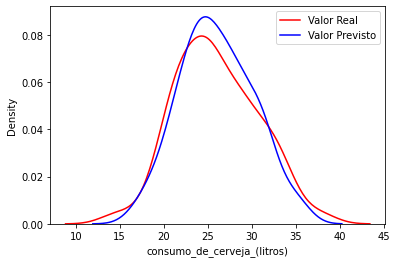

,R2,MAE,MSE,RMSE
RESULT,0.71334,2.04159,6.252673,2.500535


In [118]:
# 'Fitando' o modelo
X = df[['temperatura_maxima_(c)', 'temperatura_minima_(c)', 'final_de_semana']]
Y = df['consumo_de_cerveja_(litros)']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = Ridge()
model.fit(x_train, y_train)
yHat = model.predict(x_test)

evaluate_model(y_test, yHat)

# **6.0 Aplicação do modelo escolhido**

In [119]:
carnaval_2022 = {'data': ['2022-02-26','2022-02-27','2022-02-28','2022-03-01','2022-03-02'], 
            'temperatura_minima_(c)':[19.1,19.8,20.6,23.2,20],  
            'temperatura_maxima_(c)':[32.2,31.4,32.9,31.6,31.7],  
            'final_de_semana':[1,1,0,0,0]}
#Dados obtidos do INMET (Instituto Nacional de Meteorologia). https://portal.inmet.gov.br/

carnaval_2022 = pd.DataFrame(carnaval_2022)
carnaval_2022['temperatura_media_(c)'] = (carnaval_2022['temperatura_maxima_(c)'] + carnaval_2022['temperatura_minima_(c)'])/2
carnaval_2022

,data,temperatura_minima_(c),temperatura_maxima_(c),final_de_semana,temperatura_media_(c)
0,2022-02-26,19.1,32.2,1,25.65
1,2022-02-27,19.8,31.4,1,25.60
2,2022-02-28,20.6,32.9,0,26.75
3,2022-03-01,23.2,31.6,0,27.40
4,2022-03-02,20.0,31.7,0,25.85


In [120]:
x_2022 = carnaval_2022[['temperatura_maxima_(c)', 'temperatura_minima_(c)', 'final_de_semana']]
y_hat_2022 = model.predict(x_2022)
carnaval_2022['consumo_de_cerveja_(litros)'] = y_hat_2022
carnaval_2022 = carnaval_2022.sort_values(by=['consumo_de_cerveja_(litros)'], ascending = False)

carnaval_2022

,data,temperatura_minima_(c),temperatura_maxima_(c),final_de_semana,temperatura_media_(c),consumo_de_cerveja_(litros)
0,2022-02-26,19.1,32.2,1,25.65,33.036420
1,2022-02-27,19.8,31.4,1,25.60,32.436061
2,2022-02-28,20.6,32.9,0,26.75,28.155084
4,2022-03-02,20.0,31.7,0,25.85,27.345124
3,2022-03-01,23.2,31.6,0,27.40,27.099215


#**7.0 Conclusão**


##Segundo as previsões feitas pelo modelo, o melhor dia para vender cerveja seria no sábado de carnaval (2022-02-26). Vale resaltar que, a temperatura máxima e a temperatura média do dia 28 (segunda-feira) são mais altas do que do dia 26. Entretanto, o fator "final de semana" teve papel decisivo no consumo previsto.